# <font size=6 color='green'><center>**IT 406 - Machine learning**</center></font>
### **<center>Stock Price prediction using Machine learning<br/><br/>**

&emsp; **Name : <font color='#0099ff'>Kavish Shah</font>** (202001114)<br/>
&emsp; **Name : <font color='#0099ff'>Rishit Shah</font>** (202001411)<br/>
 &emsp; **Group ID : <font color='#0099ff'>28</font>**
 <br/>&emsp; **Dateset : <font color='#0099ff'>Infosys stock data from 1 jan 2018 to 31 dec 2022
</font>**

Import libraries

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense, LSTM
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:\\Users\\Rishit Shah\\Documents\\Semester 7\\Machine Learning\\ML_Project\\INFY.NS.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/1/2018,518.849976,522.250000,515.000000,516.775024,443.424866,5431340
1,1/2/2018,518.625000,521.000000,511.500000,514.849976,441.773010,6112248
2,1/3/2018,514.250000,515.799988,509.299988,510.649994,438.169220,6846552
3,1/4/2018,510.500000,510.500000,504.799988,507.700012,435.637939,8947614
4,1/5/2018,507.649994,513.200012,503.000000,506.000000,434.179230,11025976


In [4]:
df.shape

(1236, 7)

We can see that our dataset has 1236 rows and 7 columns

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1.236000e+03
mean,1076.214624,1087.640919,1064.793204,1076.113431,999.150996,8.391646e+06
std,431.033585,434.151321,427.069223,430.632950,431.727531,5.939231e+06
min,507.649994,510.500000,503.000000,506.000000,434.179230,4.834070e+05
25%,706.993744,712.206268,697.887497,705.299988,627.520951,5.232008e+06
50%,830.799988,837.725006,822.274994,830.399994,740.425231,6.931750e+06
75%,1496.737518,1511.887482,1481.350037,1500.600006,1437.889313,9.605249e+06
max,1938.550049,1953.900024,1930.500000,1939.500000,1848.383179,9.043211e+07


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1236 non-null   object 
 1   Open       1236 non-null   float64
 2   High       1236 non-null   float64
 3   Low        1236 non-null   float64
 4   Close      1236 non-null   float64
 5   Adj Close  1236 non-null   float64
 6   Volume     1236 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.7+ KB


In [7]:
df.nunique()

Date         1236
Open         1083
High         1145
Low          1150
Close        1186
Adj Close    1213
Volume       1236
dtype: int64

### <center>Exploratory Data Analysis(EDA)</center>

EDA (exploratory data analysis) is a way of analyzing data using visual techniques to discover trends, patterns, and assumptions. It is a useful tool for analyzing Infosys stock price data, as it can help to understand how prices have moved over time and how the end of quarters affects prices.

In other words, EDA can be used to answer the following questions about Infosys stock price data:

How have prices changed over time?
Are there any patterns in the data, such as seasonal trends or spikes in prices at the end of quarters?
What are the most important factors that affect Infosys stock prices?
Once this information is understood, it can be used to inform investment decisions or to develop trading strategies.

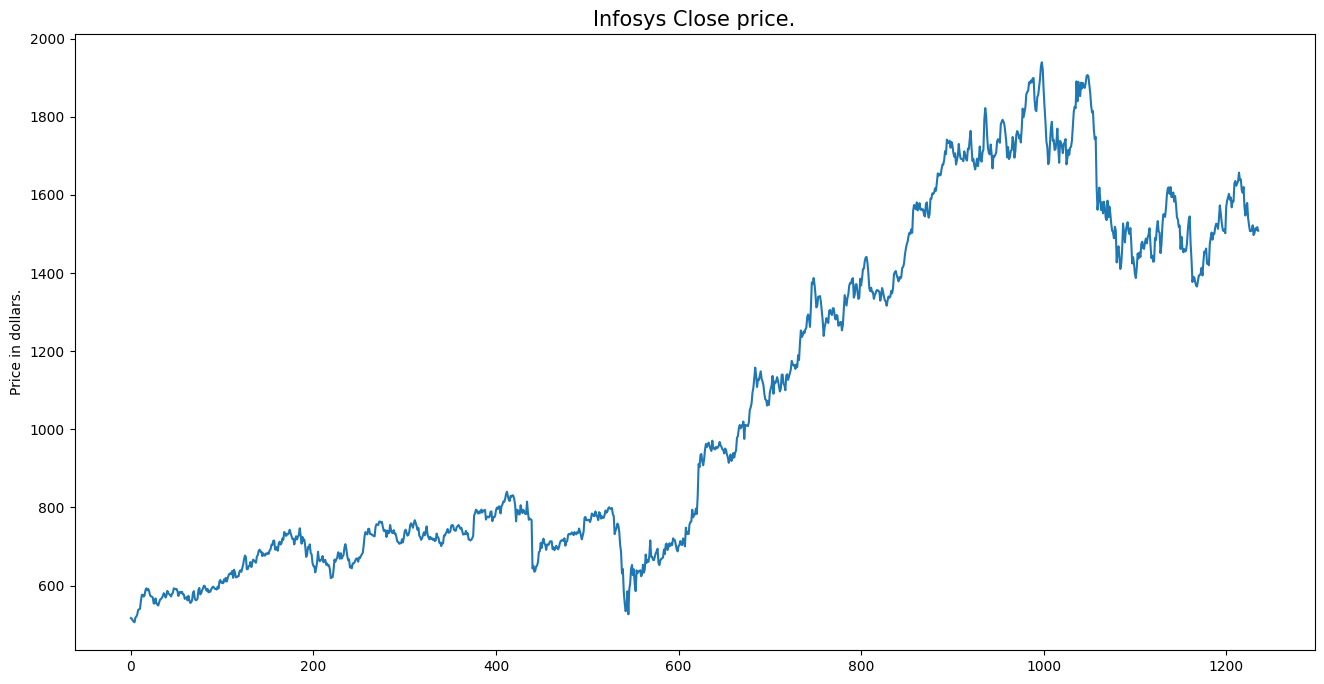

In [8]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.title('Infosys Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

The price of infosys is showing an upward trend as per the plot of the closing price of the stocks

In [9]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

This means that there is no null values in the data set.

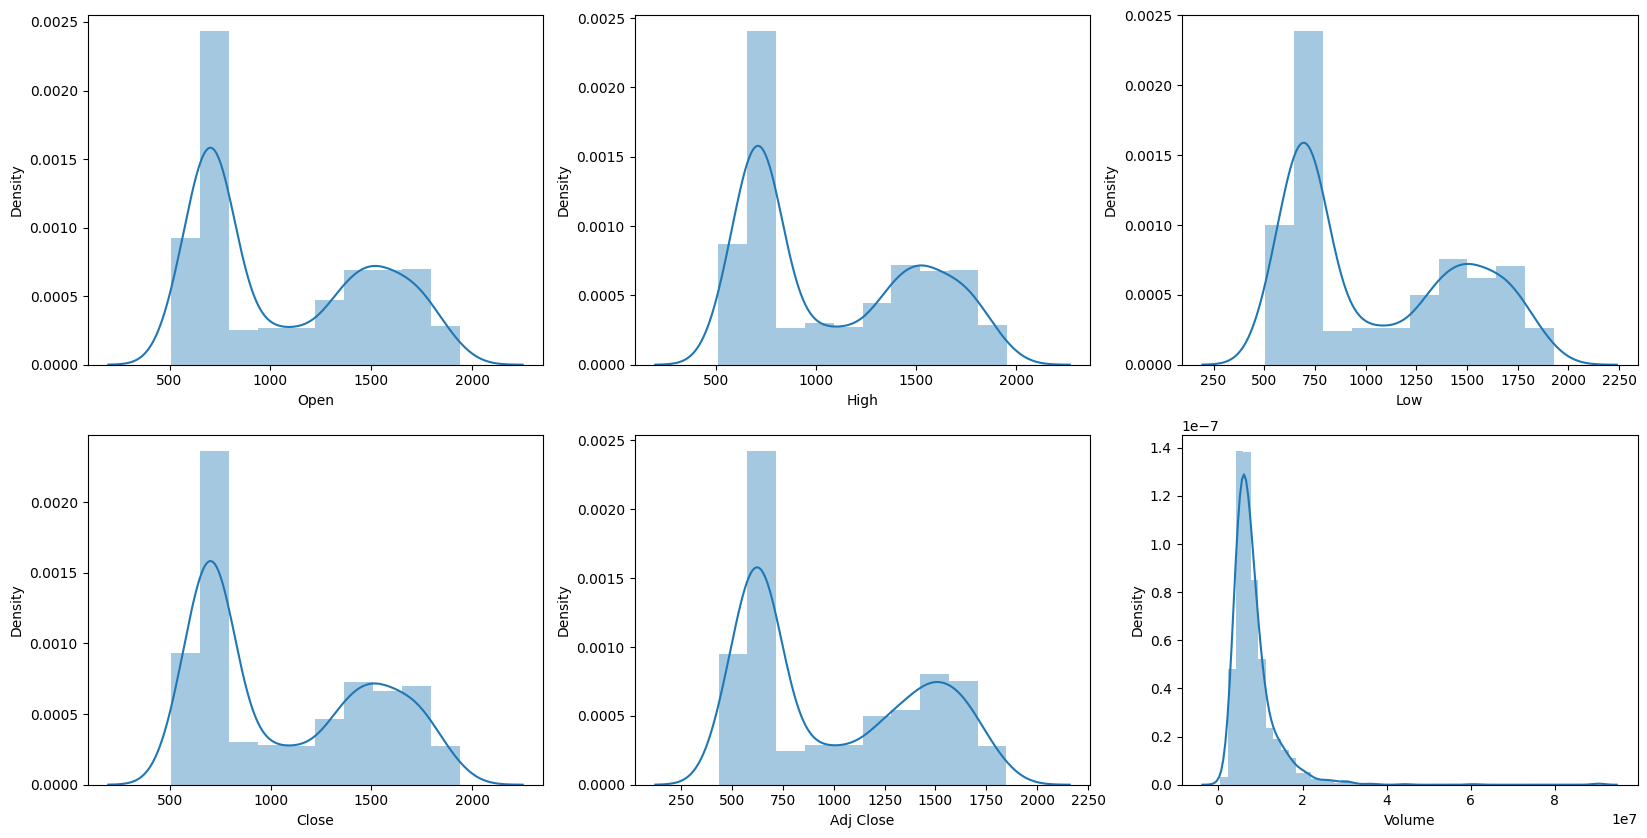

In [10]:
features = ['Open', 'High', 'Low', 'Close', 'Adj Close','Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

In the distribution plot of Infosys data, we can see two peaks which means the data has varied significantly in two regions. And the Volume data is left-skewed.

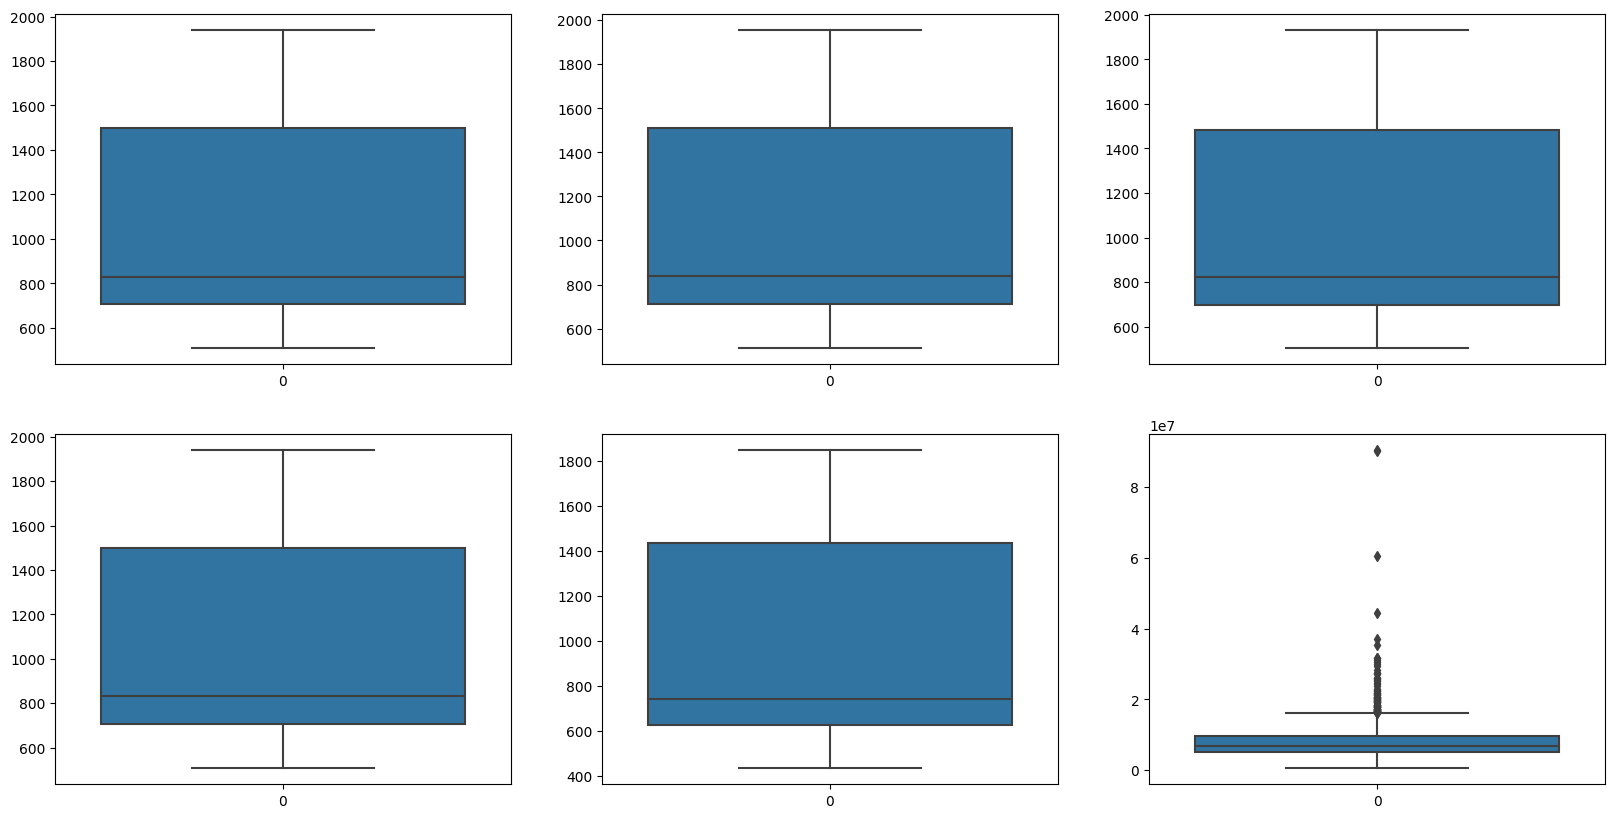

In [11]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

From the boxplot we can see that the volume data has outliers in it but the rest of the data is free from any outlier

In [12]:
splitted = df['Date'].str.split('/', expand=True)
 
df['day'] = splitted[1].astype('int')
df['month'] = splitted[0].astype('int')
df['year'] = splitted[2].astype('int')
 
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year
0,1/1/2018,518.849976,522.250000,515.000000,516.775024,443.424866,5431340,1,1,2018
1,1/2/2018,518.625000,521.000000,511.500000,514.849976,441.773010,6112248,2,1,2018
2,1/3/2018,514.250000,515.799988,509.299988,510.649994,438.169220,6846552,3,1,2018
3,1/4/2018,510.500000,510.500000,504.799988,507.700012,435.637939,8947614,4,1,2018
4,1/5/2018,507.649994,513.200012,503.000000,506.000000,434.179230,11025976,5,1,2018


We have derived three more columns from date namely day, month and year

In [13]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year,is_quarter_end
0,1/1/2018,518.849976,522.250000,515.000000,516.775024,443.424866,5431340,1,1,2018,0
1,1/2/2018,518.625000,521.000000,511.500000,514.849976,441.773010,6112248,2,1,2018,0
2,1/3/2018,514.250000,515.799988,509.299988,510.649994,438.169220,6846552,3,1,2018,0
3,1/4/2018,510.500000,510.500000,504.799988,507.700012,435.637939,8947614,4,1,2018,0
4,1/5/2018,507.649994,513.200012,503.000000,506.000000,434.179230,11025976,5,1,2018,0


A quarter is defined as a group of three months. Every company prepares its quarterly results and publishes them publicly so, that people can analyze the company’s performance. These quarterly results affect the stock prices heavily which is why we have added this feature because this can be a helpful feature for the learning model.

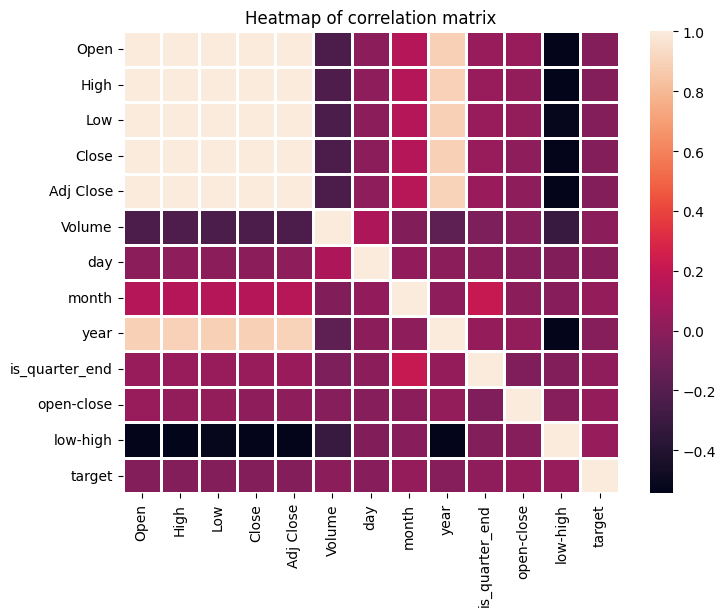

In [15]:
numeric_data = df.select_dtypes(include =[np.number]) # keep only numerical columns
numeric_data = numeric_data[[col for col in numeric_data if numeric_data[col].nunique() > 1]]
# considering only those columns which have more than one unique value
corr_matrix = numeric_data.corr()
plt.figure(figsize=(8, 6))
sb.heatmap(data = corr_matrix, lw=1)
plt.title('Heatmap of correlation matrix')
plt.show()

In [16]:
#Create a new dataframe with only the column 'Close column'
data = df.filter(['Close'])
#Convert the dataframe to numpy array
dataset = data.values
#Get the number of rows  to train the model on
train_data_len=math.ceil(len(dataset)*0.8)
train_data_len

989

In [17]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.00751658],
       [0.00617368],
       [0.0032438 ],
       ...,
       [0.70048833],
       [0.70565054],
       [0.69912797]])

In [18]:
#create the training data set
#Create the scaled training data set
train_data=scaled_data[0:train_data_len,:]
#Split the data into x_train and y_train
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.00751658, 0.00617368, 0.0032438 , 0.00118592, 0.        ,
       0.00838858, 0.01023717, 0.01403907, 0.02225324, 0.02317752,
       0.0241193 , 0.0386641 , 0.0488664 , 0.04907567, 0.0458493 ,
       0.04813394, 0.05758632, 0.06062087, 0.05699338, 0.05960936,
       0.0553366 , 0.04822114, 0.04625043, 0.04577956, 0.04401812,
       0.03339728, 0.03385073, 0.04264039, 0.0338856 , 0.03167075,
       0.02990931, 0.0357342 , 0.04047787, 0.0417684 , 0.04358212,
       0.04722707, 0.0518835 , 0.05010465, 0.04415765, 0.04820368,
       0.05601673, 0.0518835 , 0.05019185, 0.04860481, 0.04607603,
       0.05045344, 0.05280782, 0.06060342, 0.05992328, 0.05887689,
       0.05946983, 0.05577259, 0.04700035, 0.05320895, 0.05423788,
       0.05207536, 0.05427275, 0.04996512, 0.04952912, 0.04178586])]
[0.04365190931287061]

[array([0.00751658, 0.00617368, 0.0032438 , 0.00118592, 0.        ,
       0.00838858, 0.01023717, 0.01403907, 0.02225324, 0.02317752,
       0.0241193 , 0.0386641 , 0.04

In [19]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train =np.array(x_train), np.array(y_train)

In [20]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1]))
x_train.shape

(929, 60)

In [21]:
#Build the LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [22]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [23]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

929/929 [==============================] - 29s 26ms/step - loss: 0.0019


In [24]:
#Create the testing data set
#Create a new array containing scaled values from index 930 to 1237
test_data = scaled_data[train_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test=[]
y_test=dataset[train_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [25]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [26]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [27]:
predictions = model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

8/8 [==============================] - 1s 19ms/step


In [28]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

83.89683995606434

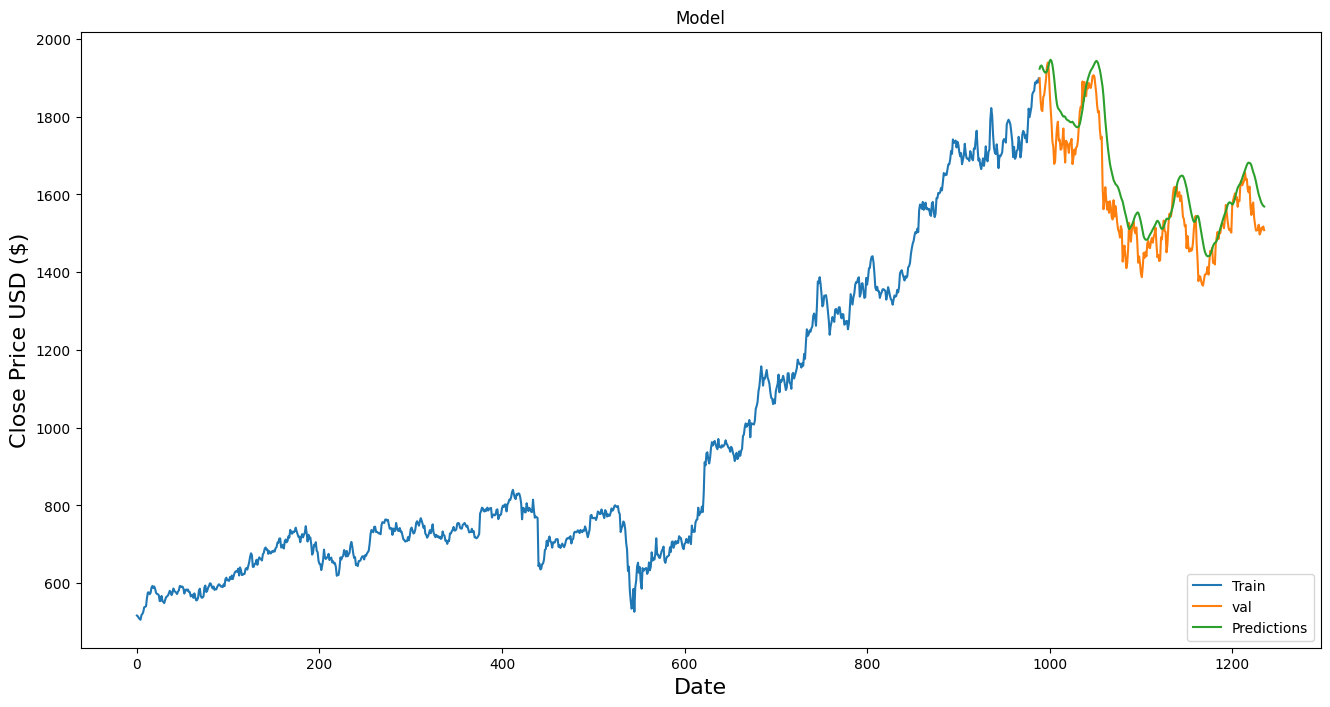

In [29]:
#Plot the data
train=data[:train_data_len]
valid=data[train_data_len:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=16)
plt.ylabel('Close Price USD ($)', fontsize=16)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','val','Predictions'],loc='lower right')
plt.show()

In [36]:
#show the valid and predicted prices
valid

,Close,Predictions,Accuracy,Error
989,1899.150024,1923.462402,1.280172,1.280172
990,1844.650024,1930.422485,4.649796,4.649796
991,1817.800049,1931.848877,6.274003,6.274003
992,1814.300049,1928.022827,6.268135,6.268135
993,1850.750000,1921.326782,3.813415,3.813415
...,...,...,...,...
1231,1502.400024,1585.211548,5.511949,5.511949
1232,1514.849976,1578.630371,4.210344,4.210344
1233,1510.150024,1574.157715,4.238499,4.238499
1234,1517.550049,1570.830444,3.510948,3.510948


In [45]:
valid['Error'] = ((abs(valid['Predictions']-valid['Close'])/valid['Close'])*100)
valid['Error']
# valid['Accuracy']

989     1.280172
990     4.649796
991     6.274003
992     6.268135
993     3.813415
          ...   
1231    5.511949
1232    4.210344
1233    4.238499
1234    3.510948
1235    4.032505
Name: Error, Length: 247, dtype: float64